<a href="https://colab.research.google.com/github/Swastik-Swarup-Dash/Machine-Learning/blob/master/STOCK_PRICE_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install yfinance

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
stocks = input("Enter the code of the stock:")
data = yf.download(stocks,"2010-01-01","2024-05-05")
data.head()

Enter the code of the stock:MTF=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-17,115.50,115.50,115.50,122.50,122.50,2
2010-12-20,122.50,122.50,122.50,122.50,122.50,2
2010-12-21,123.25,123.25,123.25,123.25,123.25,2
2010-12-22,125.50,125.50,125.50,125.50,125.50,2
2010-12-23,125.25,125.25,125.25,125.25,125.25,2


In [6]:
data.shape

(3255, 6)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000
mean,102.284065,102.323103,102.267899,102.309871,102.309871,38.595699
std,65.213389,65.201462,65.159295,65.147687,65.147687,89.005276
min,30.350000,38.580002,30.350000,38.580002,38.580002,0.000000
25%,62.500000,62.500000,62.500000,62.500000,62.500000,0.000000
50%,85.650002,85.750000,85.650002,85.750000,85.750000,2.000000
75%,116.449997,116.449997,116.449997,116.474998,116.474998,35.000000
max,438.350006,438.350006,438.350006,438.350006,438.350006,1245.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3255 entries, 2010-12-17 to 2024-05-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3255 non-null   float64
 1   High       3255 non-null   float64
 2   Low        3255 non-null   float64
 3   Close      3255 non-null   float64
 4   Adj Close  3255 non-null   float64
 5   Volume     3255 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.0 KB


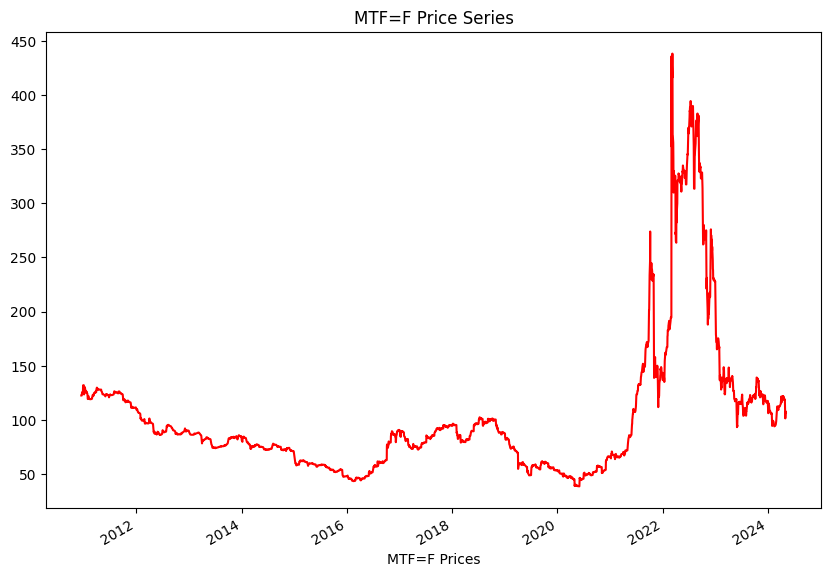

In [9]:
data.Close.plot(figsize=(10,7),color='r')
plt.xlabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

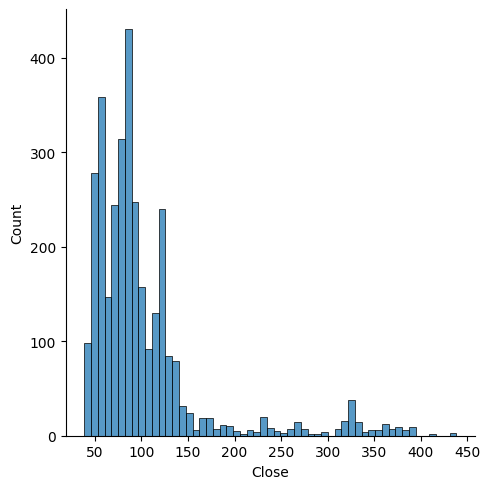

In [10]:
sns.displot(data["Close"])

<ipython-input-11-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

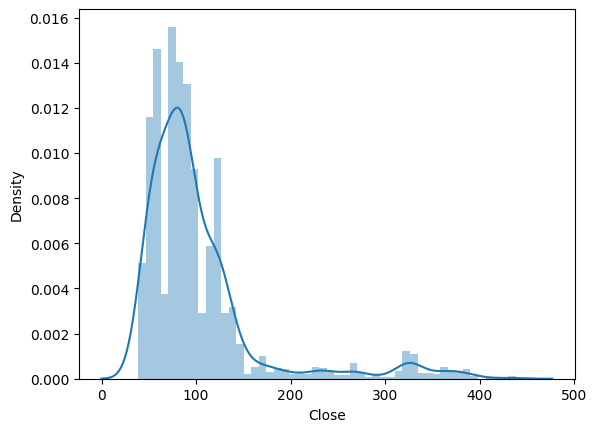

In [11]:
sns.distplot(data["Close"])

<ipython-input-12-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

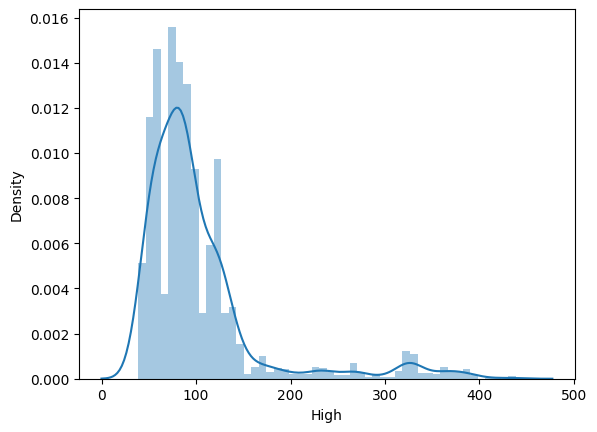

In [12]:
sns.distplot(data["High"])

In [13]:
X = data.drop("Close",axis = 1)
Y = data["Close"]

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=111)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2604, 5)
(651, 5)
(2604,)
(651,)


In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
pred1 = lr.predict(X_test)
print("Actual value of the house:- ", X_test)
print("Model Predicted Value:- ", pred1)

Actual value of the house:-                    Open        High         Low   Adj Close  Volume
Date                                                              
2015-02-24   61.750000   61.750000   61.750000   61.750000      30
2012-05-22   86.500000   86.500000   86.500000   86.500000       5
2018-05-31   95.000000   95.000000   95.000000   95.000000       5
2012-11-05   86.550003   86.550003   86.550003   86.550003      25
2017-08-28   85.320000   85.320000   85.320000   85.320000       0
...                ...         ...         ...         ...     ...
2017-06-19   79.099998   79.099998   79.099998   79.099998       0
2015-04-28   59.580002   59.580002   59.580002   59.580002       0
2016-08-24   60.250000   60.250000   60.250000   60.250000       0
2022-03-28  325.250000  325.250000  325.250000  325.250000       0
2017-04-26   75.349998   75.349998   75.349998   75.349998       0

[651 rows x 5 columns]
Model Predicted Value:-  [ 61.75        86.5         95.          86.5500030

In [15]:
pred1

array([ 61.75      ,  86.5       ,  95.        ,  86.55000305,
        85.31999969, 108.30000305,  72.09999847, 101.        ,
        85.25      ,  90.44999695,  52.54999924,  45.04999924,
        53.45000076,  51.20000076, 356.        ,  83.        ,
       374.6499939 ,  39.        ,  95.34999847,  62.09999847,
        56.79999924,  77.        ,  53.63000107, 138.5       ,
       373.3500061 ,  60.36000061,  51.90000153,  91.75      ,
        53.09999847, 310.        ,  56.84999847,  88.55000305,
       135.5       ,  81.25      , 131.25      ,  75.25      ,
       134.5       , 122.94999695,  87.05000305,  61.95000076,
        53.34999847,  94.75      , 119.02999878,  58.75      ,
        80.34999847,  88.75      ,  46.18999863, 149.1499939 ,
       136.75      ,  87.44999695,  46.40000153,  68.44000244,
        55.86999893,  92.30000305, 117.90000153, 133.19999695,
       112.15000153,  75.05000305, 114.65000153, 137.8500061 ,
        39.15000153,  84.59999847,  47.90000153,  89.30

In [16]:
#MSE
#RMSE
#r2_square

from sklearn.metrics import mean_squared_error,r2_score
'''
Y_test
Y_pred

'''
def calculate_metrics(Y_test,Y_pred):
    mse = mean_squared_error(Y_test,Y_pred)
    rmse = np.sqrt(mse)
    r2_scoore = r2_score(Y_test,Y_pred)

    print("MSE",mse)
    print("RMSE",rmse)
    print("R2",r2_scoore)

calculate_metrics(Y_test,pred1)

MSE 7.00518177979487e-26
RMSE 2.6467303942401974e-13
R2 1.0


In [17]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train,Y_train)
ri = Ridge().fit(X_train,Y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+03, tolerance: 1.091e+03
  model = cd_fast.enet_coordinate_descent(


In [18]:
calculate_metrics(Y_test,la_p)

MSE 0.005988182345655439
RMSE 0.07738334669459211
R2 0.9999986561836547


In [19]:
calculate_metrics(Y_test,ri_p)

MSE 1.8683078306418204e-07
RMSE 0.0004322392659907034
R2 0.9999999999580731


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param = {'C':[0.1,1,10,100,1000],
         'gamma':[1,0,0.01,0.001,0.0001],
         'kernel':['rbf']}

grid = GridSearchCV(SVR(),param,refit=True,verbose=3)
grid.fit(X_train,Y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.046 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.061 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.049 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.060 total time=   0.6s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.051 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.085 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.065 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.054 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.066 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.011 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
svr = SVR(C=10,gamma=0.01,kernel="rbf")
svr.fit(X_train,Y_train)
svr_pred = svr.predict(X_test)


In [26]:
import joblib

joblib.dump(la,'model.pkl')

lasso_from_joblib=model = joblib.load('model.pkl')

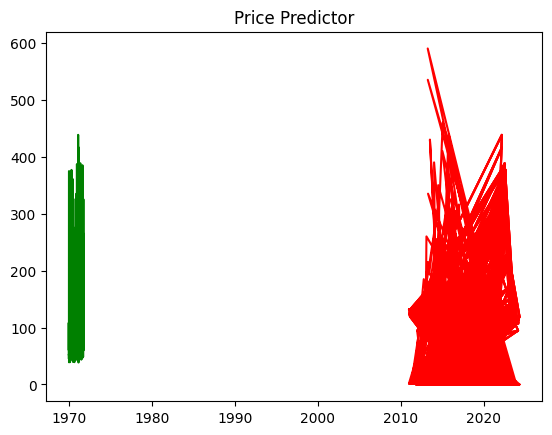

In [23]:
sns.plot(X_test,color='red',label="Actual price")
plt.plot(pred1,color='green',label="predicted price")
plt.title("Price Predictor")
plt.show()